# Data Preprocessing stage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Inserting Dataframe

In [ ]:
dataset = pd.read_csv('Amazon Sales data.csv')
dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Cleaning Data

In [ ]:
# Cleaning the Date column by removing any extra characters
dataset['Order Date'] = dataset['Order Date'].str[:8]
dataset['Ship Date'] = dataset['Ship Date'].str[:8]

# Converting Date to datetime format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%m-%d-%y', errors='coerce')
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%m-%d-%y', errors='coerce')


In [ ]:
# Handling missing values if any
dataset.fillna('', inplace=True)

#Generate Key Insights


In [ ]:
# Number of Online orders
Online_orders = dataset[dataset['Sales Channel'] == 'Online'].shape[0]

# Number of Offline orders
Offline_orders = dataset[dataset['Sales Channel'] == 'Offline'].shape[0]

In [ ]:
print("Number of Online orders:", Online_orders)
print("Number of Offline orders:", Offline_orders)

Number of Online orders: 50
Number of Offline orders: 50


In [ ]:
# Calculate Total Sales Amount
total_sales = dataset['Total Revenue'].sum()
print("Total Sales Amount:", total_sales)


Total Sales Amount: 137348768.31


In [ ]:
# Distribution of orders by Item Type
orders_by_ItemType = dataset['Item Type'].value_counts()
print(orders_by_ItemType)

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64


In [ ]:
# Distribution of orders by Region
orders_by_Region = dataset['Region'].value_counts()
print(orders_by_Region)

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64


**Key Findings**
- The total sales amount is significant, indicating a healthy volume of transactions.
- There is same ammount of online and offline orders which means there is Balanced Sales Channels and Market Reach
- ClothesClothes, Cosmetics and Office Supplies  are the most popular categories, suggesting these could be focus areas for future promotions.
- Most orders are from Sub-Saharan Africa and Europe.


# Data Visualization

<Axes: ylabel='count'>

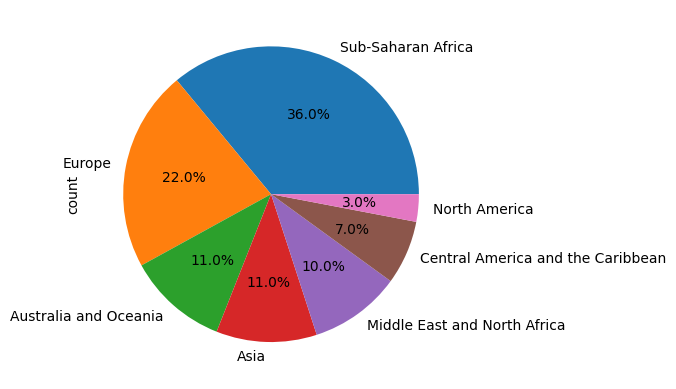

In [ ]:
# @title Region
# 1. Distribution of Sales by Region:
dataset['Region'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

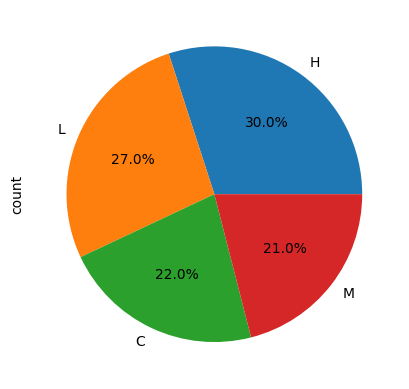

In [ ]:
# @title Order Priority
# 4. Distribution of Sales by Order Priority:
dataset['Order Priority'].value_counts().plot.pie(autopct='%1.1f%%')


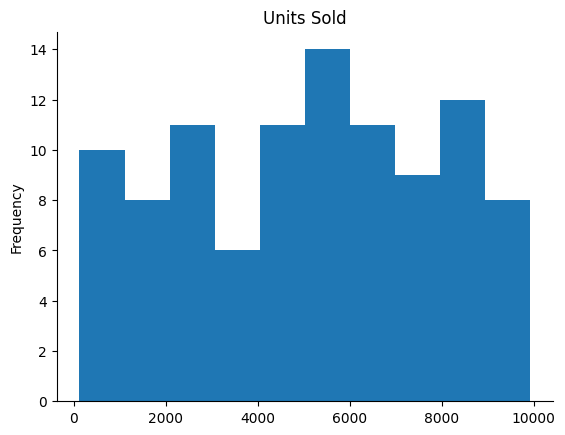

In [ ]:
# @title Units Sold
from matplotlib import pyplot as plt
dataset['Units Sold'].plot(kind='hist', bins=10, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

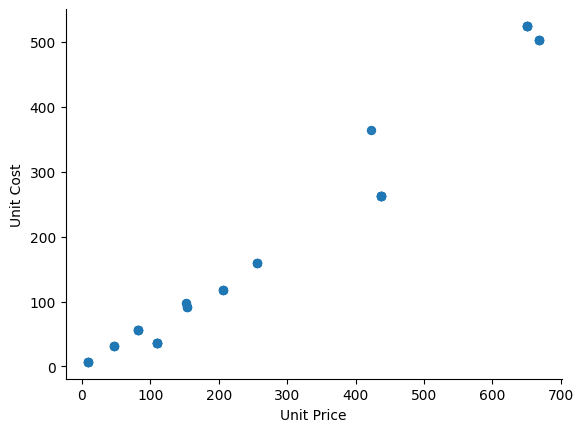

In [ ]:
# @title Unit Price vs Unit Cost
from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Unit Price', y='Unit Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Now make some prediction by spliting Datasets

In [ ]:
# @title Predicting Total Profit by multiple linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming columns 'Units Sold', 'Unit Price', 'Unit Cost' are relevant for predicting 'Total Profit'
X = dataset[['Units Sold', 'Unit Price', 'Unit Cost']]
y = dataset['Total Profit']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting 'Total Profit' for the test data
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   85.86868807  6098.94653741 -6337.55791679]
Intercept: -479718.99706811714


# Graph on this multiple linear regression

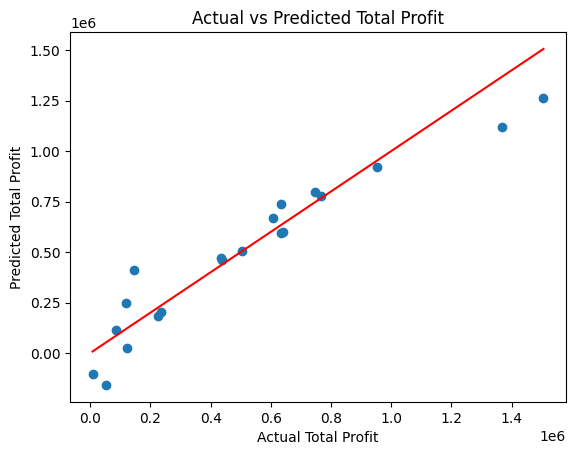

In [ ]:
import matplotlib.pyplot as plt
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Profit")
plt.ylabel("Predicted Total Profit")
plt.title("Actual vs Predicted Total Profit")

# Adding a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()


#Evaluation the model performence

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9095678745429014
